###Introduction to Neural Network classification With TensorFlow

A few types of classification problems:
 - Binary Classification
 - MultiClass Classification
 - Multilabel Classification

Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


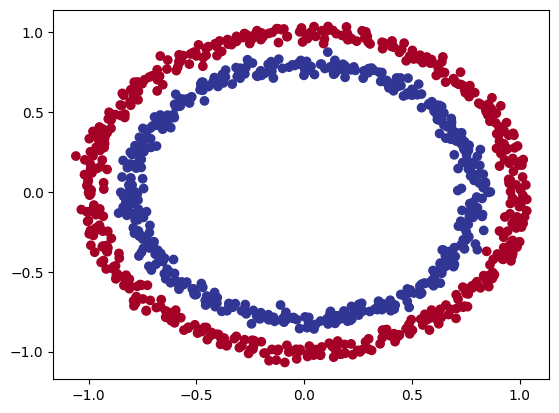

In [ ]:
#visualize the plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

Input and output shapes

In [ ]:
#Check the shape of our features
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#how many samples we are working
len(X),len(y)

(1000, 1000)

In [ ]:
#view the first example of the features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

###Steps in modelling

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.7997 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7642 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3315 - accuracy: 0.4710
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 3.7228 - accuracy: 0.4730
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0611 - accuracy: 0.4870


In [ ]:
#To increase the accuracy lets increase the Tarining time
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

since we are working on binary classification problem the accuracy of 50% is not enough hence we need to add extra layers to increase the accuracy

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100,verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932311654090881, 0.5]

Improving the model

In [ ]:
#set the random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5090


[0.6970463991165161, 0.5090000033378601]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48597783],
       [0.5579211 ],
       [0.56172115],
       [0.56273395],
       [0.4537077 ],
       [0.56631774],
       [0.54847765],
       [0.481569  ],
       [0.4885552 ],
       [0.56309736],
       [0.5227004 ],
       [0.52117836],
       [0.55485296],
       [0.4630496 ],
       [0.458916  ],
       [0.47191358],
       [0.5458777 ],
       [0.47479928],
       [0.550245  ],
       [0.51415014],
       [0.5015904 ],
       [0.5779515 ],
       [0.47258162],
       [0.48868644],
       [0.5784232 ],
       [0.568889  ],
       [0.5409926 ],
       [0.46607852],
       [0.46844363],
       [0.46125293],
       [0.4911173 ],
       [0.5669962 ],
       [0.54653996],
       [0.46420026],
       [0.47295216],
       [0.5821686 ],
       [0.5662462 ],
       [0.5216997 ],
       [0.4690795 ],
       [0.5038006 ],
       [0.51069593],
       [0.53544265],
       [0.5205487 ],
       [0.4619847 ],
       [0.5306534 ],
       [0.5442864 ],
       [0.45882082],
       [0.535

To visualize our models predictions, lets create a function 'plot_decision_boundary'.

- Take in the trained models,features X and labels y
- Create a meshgrid of different X values
- Make predictions accross the meshgrid
- Plot the predictions as well as a line between zones(where each unique class falls)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_boundary(model,X,y):
  #Define the axis boundary of the plot and create a meshgrid
  X_min,X_max=X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

  XX,yy = np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(y_min,y_max,100))

  #create x value(We're going to make predictions on  these)
  X_in = np.c_[XX.ravel(),yy.ravel()] #stack 2d arrays together
#Make predictions
  y_pred = model.predict(X_in)

  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multi class classification")

    #We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(XX.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(XX.shape)

  plt.contourf(XX,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(XX.min(),XX.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


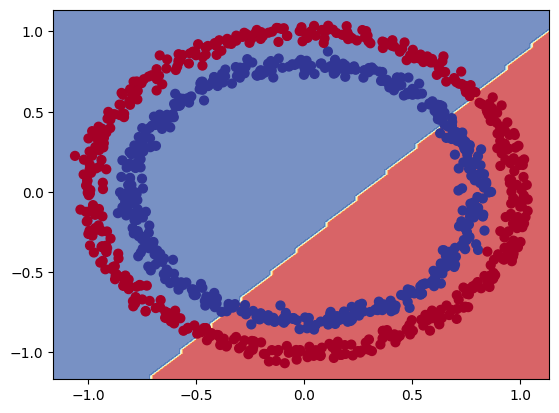

In [ ]:
#check the prediction which the model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

The missing piece Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8584 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8633 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8507 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8485 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8255 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7910 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7437 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6961 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6745 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6334 - accuracy: 0.4820
Epoch 11/

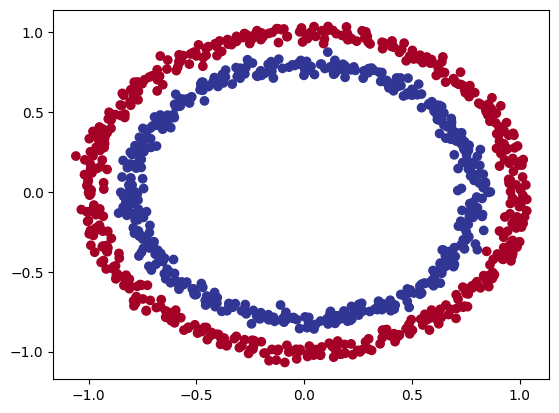

In [ ]:
#check out the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


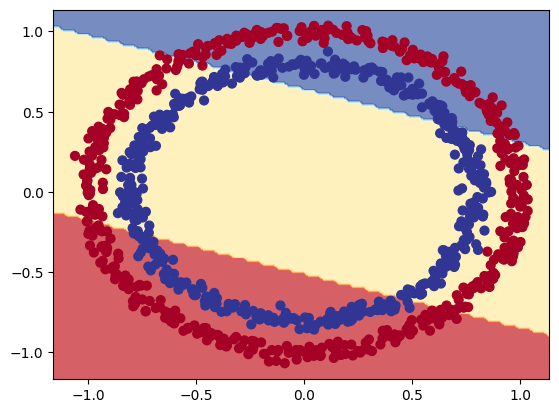

In [ ]:
#check out the decision boundary
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Build a model with non-linearity

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3336 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3023 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2193 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1537 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0866 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9998 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9642 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9461 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8978 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8118 - accuracy: 0.4710
Epoch 11/

Replicate the multi-layer neural network

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=250)


Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.5852 - accuracy: 0.4740
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2441 - accuracy: 0.4720
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1029 - accuracy: 0.4710
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0144 - accuracy: 0.4710
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9596 - accuracy: 0.4710
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9184 - accuracy: 0.4740
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.4730
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8586 - accuracy: 0.4730
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.4750
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8145 - accuracy: 0.4750
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9850


[0.04900423064827919, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification


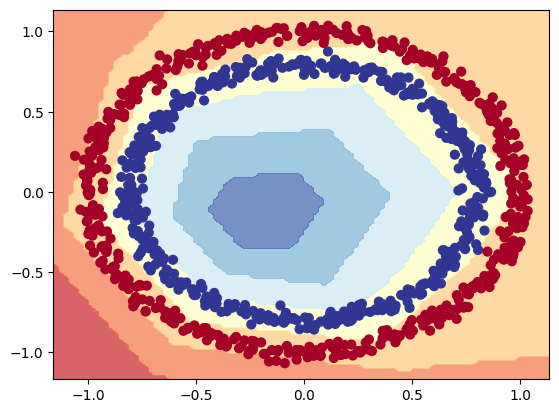

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5100
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5260
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5310
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5320
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5240
Epoch 11/

In [ ]:
#evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.9630


[0.29819050431251526, 0.9629999995231628]

313/313 [==============================] - 0s 1ms/step
doing binary classification


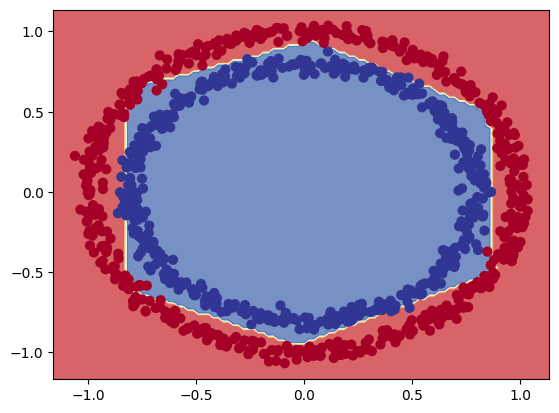

In [ ]:
plot_decision_boundary(model_7,X,y)

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

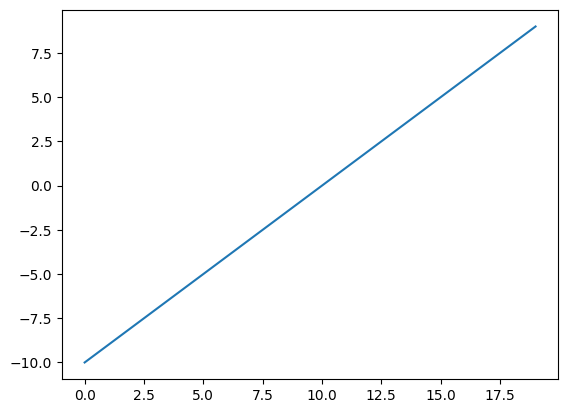

In [ ]:
#visualize
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

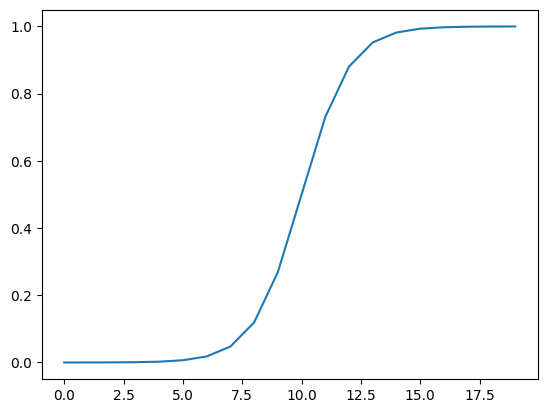

In [ ]:
plt.plot(sigmoid(A))

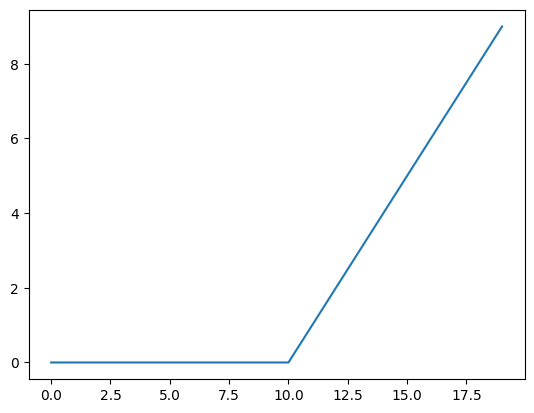

In [ ]:
def relu(x):
  return tf.maximum(0,x)

plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

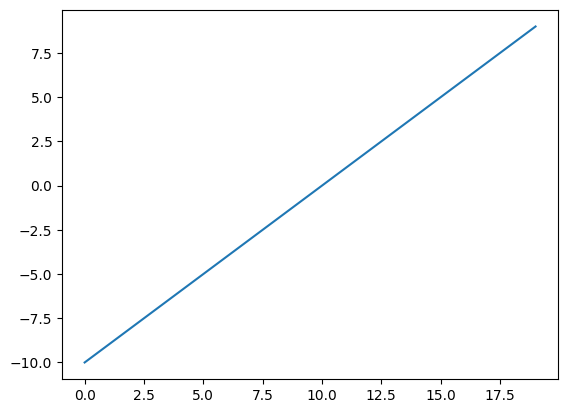

In [ ]:
plt.plot(tf.keras.activations.linear(A))

###Evaluating and Improving the classification

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((670, 2), (330, 2), (670,), (330,))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs = 200)

Epoch 1/200
21/21 [==============================] - 1s 4ms/step - loss: 0.6997 - accuracy: 0.4746
Epoch 2/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4910
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.4910
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4896
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4881
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5134
Epoch 7/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5149
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5164
Epoch 9/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5194
Epoch 10/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5209
Epoch 11/

In [ ]:
model_8.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7303


[0.5413598418235779, 0.7303030490875244]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


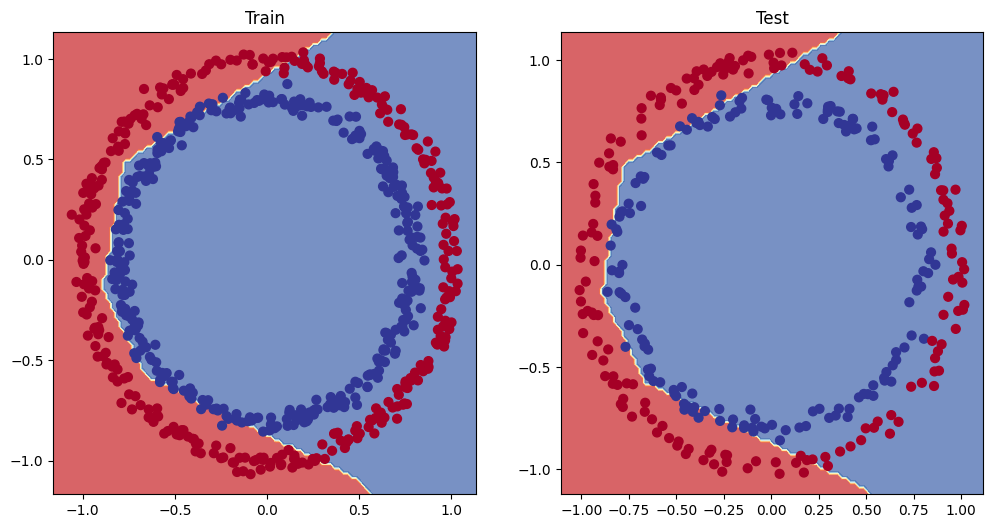

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

Plot the loss(or training) curve

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.699694,0.474627
1,0.698116,0.491045
2,0.696990,0.491045
3,0.696343,0.489552
4,0.695514,0.488060
...,...,...
195,0.546222,0.755224
196,0.545262,0.747761
197,0.544449,0.753731
198,0.543550,0.755224


Text(0.5, 1.0, 'Model_8 loss curves')

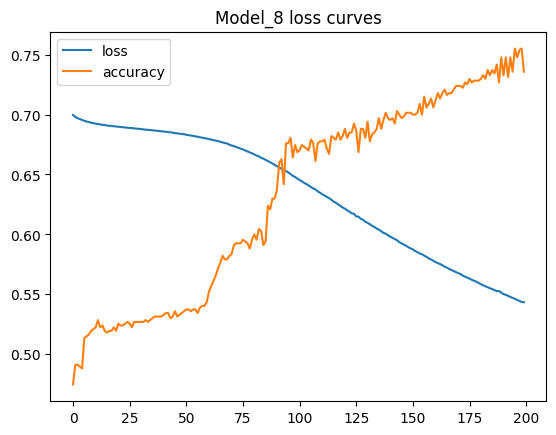

In [ ]:
#plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

###Finding the best Learning Rate

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

#creating a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.4955 - lr: 1.0000e-04
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5030 - lr: 1.2589e-04
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5045 - lr: 1.4125e-04
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5030 - lr: 1.5849e-04
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5045 - lr: 1.7783e-04
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5090 - lr: 1.9953e-04
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5134 - lr: 2.2387e-04
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss:

<Axes: >

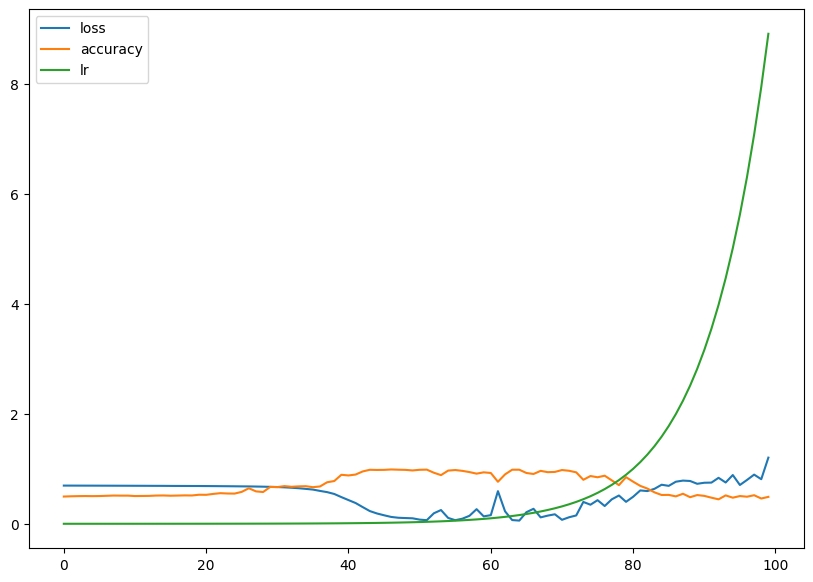

In [ ]:
#checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7))

In [ ]:
#plot the learning rate versus the loss
lrs=1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs Loss')

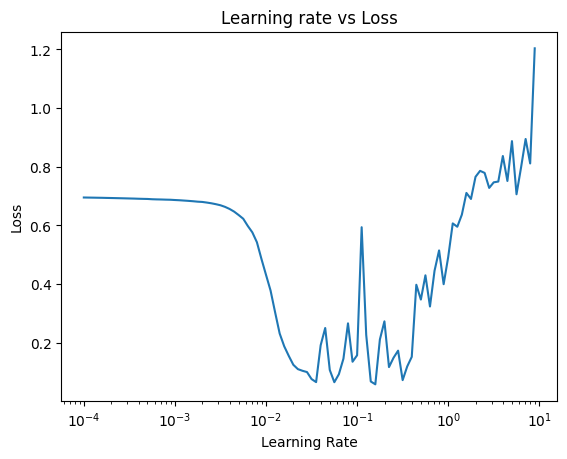

In [ ]:
 plt.semilogx(lrs,history_9.history["loss"])
 plt.xlabel("Learning Rate")
 plt.ylabel("Loss")
 plt.title("Learning rate vs Loss")

In [ ]:
#Lets try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train,y_train,epochs=100)


Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.7173 - accuracy: 0.4985
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.4910
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.4955
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4299
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4343
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4776
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.4746
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.4761
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4866
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4836
Epoch 11/

In [ ]:
#evaluate model_10 ont the test dataset

model_10.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6152


[0.6652384996414185, 0.6151515245437622]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


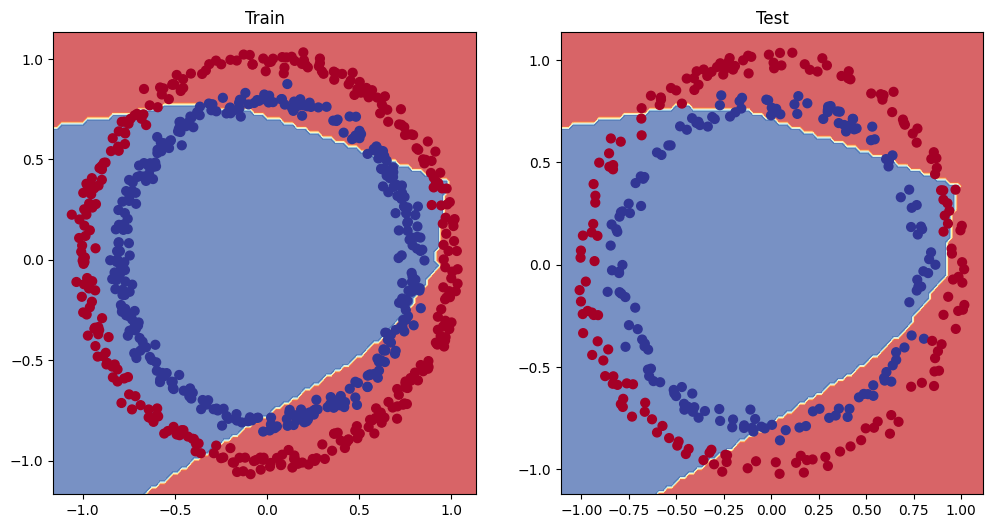

In [ ]:
#plot decision boundaries for train and test

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()


###More classification evaluation methods

- Accuracy
- Precision
- Recall
- F!-score
- Confusion matrix
- Classification report


In [ ]:
#Check the accuracy of the model
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

11/11 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6152
Model loss on the test set: 0.6652384996414185
Model accuracy on the test set: 61.52%


In [ ]:
#create confusion matrix
from sklearn.metrics import confusion_matrix

#make predictions
y_preds = model_10.predict(X_test)

#create confusion matrix
confusion_matrix(y_test, y_preds)

11/11 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
#To resolve the output error
#convert the predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#create the confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[110,  64],
       [ 63,  93]])

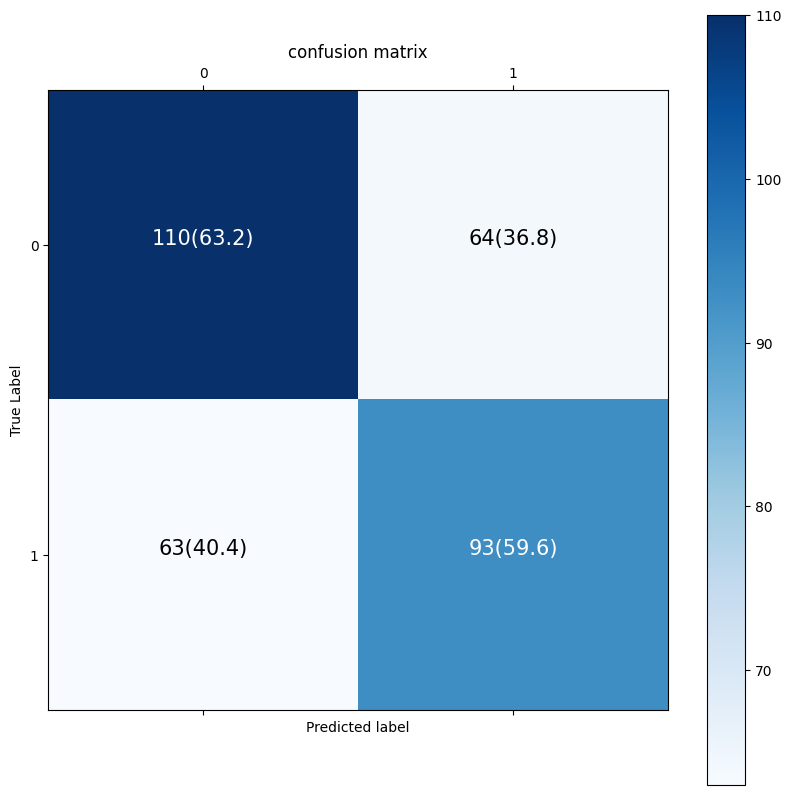

In [ ]:
import itertools

figsize = (10,10)

#create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes=cm.shape[0]

#Make it look pretty
fig, ax = plt.subplots(figsize=figsize)

#create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes =False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#label the axis
ax.set(title="confusion matrix",
       xlabel="Predicted label",
       ylabel = "True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#set threshold for differenet colours
threshold = (cm.max()+cm.min())/2.

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f})",
  horizontalalignment="center",
  color="white" if cm[i,j]>threshold else "black",
           size=15)

In [ ]:
n_classes

2

In [ ]:
cm_norm

array([[0.63218391, 0.36781609],
       [0.40384615, 0.59615385]])

###Working with larger data (Multi-class labelling)

when you have more than two classes as option then its a multi-class classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data is already been sorted into training and testing data
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#show the first trianing example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

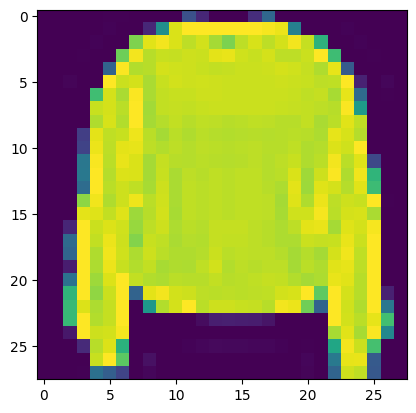

In [ ]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
#check out samples labels
train_labels[7]

2

In [ ]:
#create a small list so we can index onto our training labels so they are human readable
class_names=["T-shirts/top","Trousers","Pullover","Dress","Coat","sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trousers')

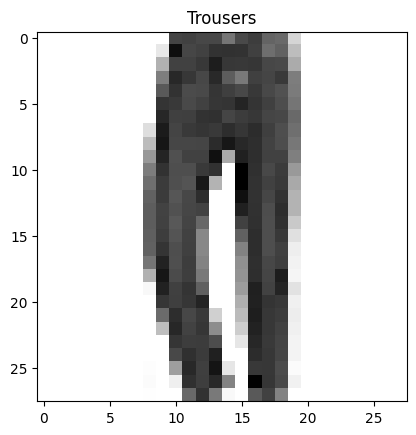

In [ ]:
#plot an example image and its label
index_of_choice=71
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

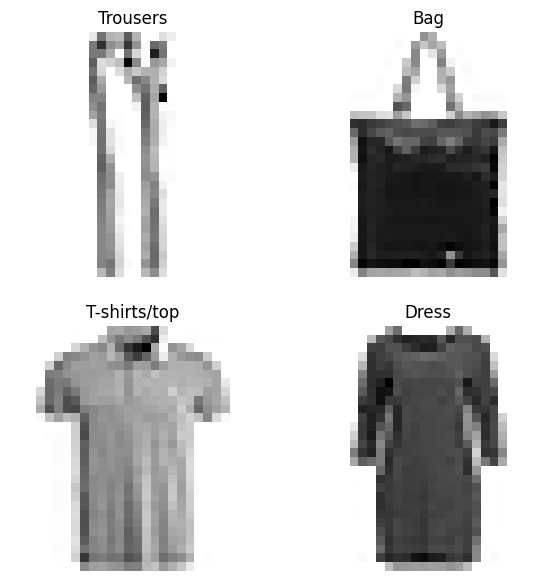

In [ ]:
#plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

###Build a multi-class classification model

For the multi class classification model, we can use a similar architecture to our binary classifiers, however we are going to have a few things:

 - Input shape = 28 x 28(the shape of one image)
 - Output shape = 10(one per class of clothing)

- Loss function = tf.keras.losses.CategoricalCrossentropy
  - If the labels are one-hot encoded use CategoricalCrossentropy()
  - If the labels are integers use SparseCategoricalCrossentropy()

- Output layer activation=Softmax(not sigmoid)

In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3309 - accuracy: 0.1023 - val_loss: 2.2772 - val_accuracy: 0.1139
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2553 - accuracy: 0.1224 - val_loss: 2.2468 - val_accuracy: 0.1243
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1963 - accuracy: 0.1449 - val_loss: 2.1741 - val_accuracy: 0.1433
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1238 - accuracy: 0.1574 - val_loss: 2.1037 - val_accuracy: 0.1714
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0995 - accuracy: 0.1698 - val_loss: 2.0925 - val_accuracy: 0.1762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0449 - accuracy: 0.1948 - val_loss: 2.0367 - val_accuracy: 0.2024
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7102 - accuracy: 0.2897 - val_loss: 1.6033 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3540 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

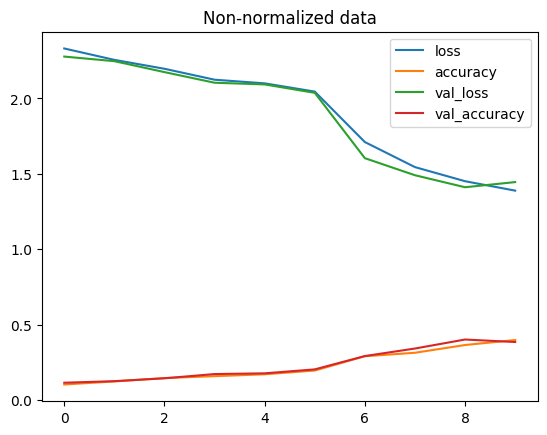

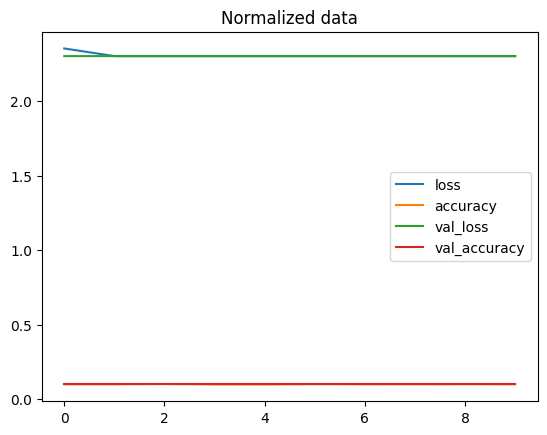

In [ ]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#plot normailzed data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

###Finding the Ideal Learning Rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9802 - accuracy: 0.3014 - val_loss: 1.7310 - val_accuracy: 0.3820 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6227 - accuracy: 0.3946 - val_loss: 1.5413 - val_accuracy: 0.4165 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4357 - accuracy: 0.4583 - val_loss: 1.3397 - val_accuracy: 0.5399 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2314 - accuracy: 0.5975 - val_loss: 1.1649 - val_accuracy: 0.6065 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0914 - accuracy: 0.6264 - val_loss: 1.0610 - val_accuracy: 0.6269 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9990 - accuracy: 0.6551 - val_loss: 0.9796 - val_accuracy: 0.6567 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'Finding the ideal learning rate')

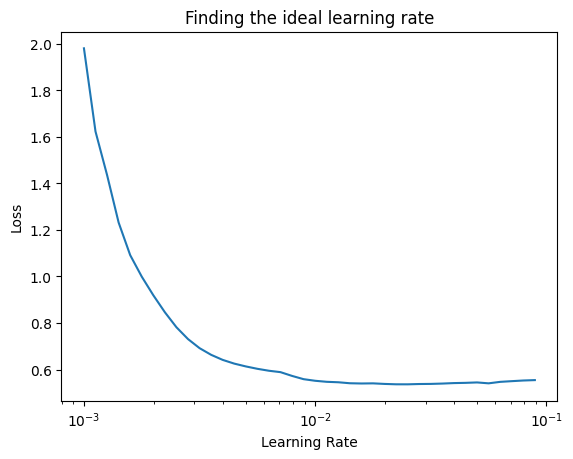

In [ ]:
#plot the learning rate dacay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1454 - accuracy: 0.5228 - val_loss: 0.8500 - val_accuracy: 0.6860
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7778 - accuracy: 0.7191 - val_loss: 0.7643 - val_accuracy: 0.7366
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7171 - accuracy: 0.7421 - val_loss: 0.7226 - val_accuracy: 0.7454
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6834 - accuracy: 0.7552 - val_loss: 0.6949 - val_accuracy: 0.7494
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6599 - accuracy: 0.7622 - val_loss: 0.6698 - val_accuracy: 0.7571
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6411 - accuracy: 0.7691 - val_loss: 0.6884 - val_accuracy: 0.7567
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6282 - accuracy: 0.7745 - val_loss: 0.6482 - val_accuracy:

###Evaluating our model

- To evaluate multi-class classification model
  - Evaluate its performance using other classification metrics(such as a confusion matrix)
  - Assess some of its predictions(through visualization)
  - Improve its results by training it for longer or changing the architecture
  - Save and export it for use in an application

In [ ]:
#Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  #create the confusion matrix
  cm=confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes=cm.shape[0]

  #Make it look pretty
  fig, ax = plt.subplots(figsize=figsize)

  #create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axis
  ax.set(title="confusion matrix",
        xlabel="Predicted label",
        ylabel = "True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("Bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set threshold for differenet colours
  threshold = (cm.max()+cm.min())/2.

  #plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f})",
    horizontalalignment="center",
    color="white" if cm[i,j]>threshold else "black",
            size=15)


In [ ]:
class_names

['T-shirts/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Make some predictions with one model
y_probs = model_14.predict(test_data)

#View the first five predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Make a prettier confusion matrix

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)


ValueError: ignored

In [ ]:
def plot_random_image(model,images,true_labels,classes):
  i=random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"

  else:
    color="red"

  plt.xlabel("Pred: {}{:2.0f}%(True:{})", format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color=color)

1/1 [==============================] - 0s 25ms/step


TypeError: ignored

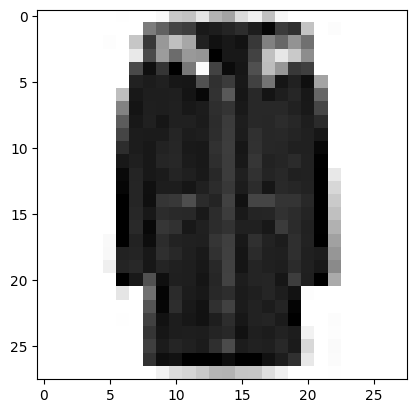

In [ ]:
#check out random image and its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)